In [1]:
# RPT prac 09 B3 I066 Srihari Thyagarajan 15th October

In [2]:
"""
Application of Markov Chain Rule.
1. Write a program for Gambler's ruin and obtain the simulation graph.
2. This 
"""

"\nApplication of Markov Chain Rule.\n1. Write a program for Gambler's ruin and obtain the simulation graph.\n"

Gambler’s Ruin The random walk described above assumes that the process can continue forever; in other words, it is unbounded. If the walk is bounded, then the ends of the walk are called barriers. These barriers can impose different characteristics on the process. For example, they can be reflecting barriers, which means that on hitting them the walk turns around and continues. They can also be absorbing barriers, which means that the walk ends.

Consider the following random walk with absorbing barriers, which is gen- erally referred to as the gambler’s ruin. Suppose a gambler plays a sequence of independent games against an opponent. He starts out with $ k, and in each game he wins $ 1 with probability p and loses $ 1 with probability q = 1 - p. When p > q, the game is advantageous to the gambler either because he is more skilled than his opponent or the rules of the game favor him. If p = q, the game is fair; and if p < q, the game is disadvantageous to the gambler.

Assume that the gambler stops when he has a total of $ N, which means he has additional $ (N - k) over his initial $ k. (Another way to express this is that he plays against an opponent who starts out with $ (N - k) and the game stops when either player has lost all of his or her money.) We are interested in computing the probability rk that the player will be ruined (or he has lost all of his or her money) after starting with $ k.

To solve the problem, we note that at the end of the first game, the player will have the sum of $ k + 1 if he wins the game (with probability p) and the sum of $ (k − 1) if he loses the game (with probability q). Thus, if he wins the first game, the probability that he will eventually be ruined is rk+1 ; and if he loses his first game, the probability that he will be ruined is rk−1 . There are two boundary conditions in this problem. First, r0=1, since he cannot gamble when he has no money. Second, rN=0, since he cannot be ruined. Thus, we obtain the following difference equation:

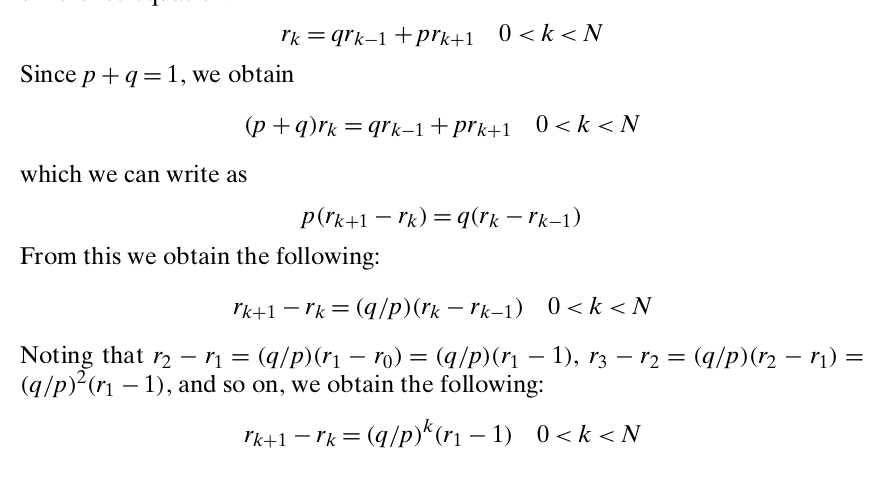
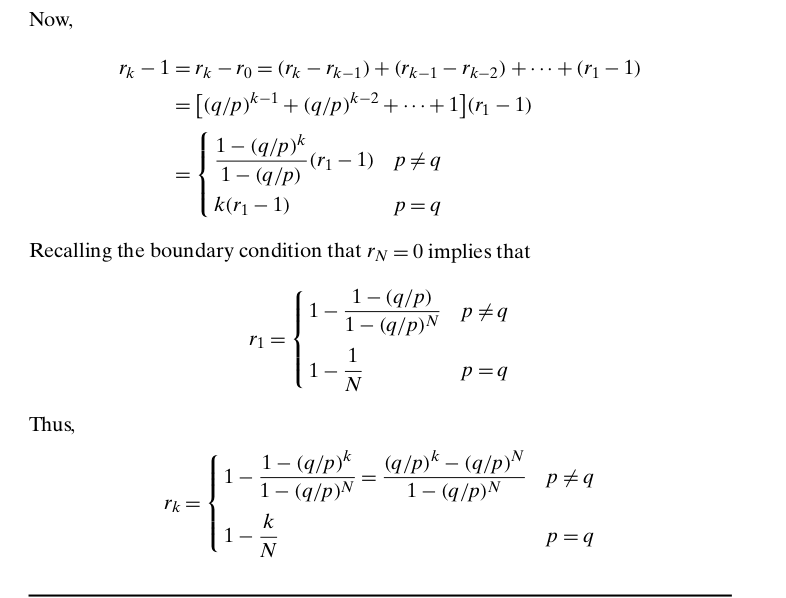

Gambler’s Ruin as a Markov Chain
Recall the gambler’s ruin problem discussed in section 10.3.1. Two players A and B play a series of games with A starting with $ a and B starting with $ b, where a+b=N. With probability p player A wins each game from player B and thus gains an additional $ 1; and with probability q=1−p player A loses each game to B and thus loses $ 1. If A reaches $ 0 he is ruined, and the game ends. Similarly if B reaches $ 0, he is ruined and the game is over. Let the state of the game be k, which denotes the total amount that A currently has. Thus, the game ends when k=0 and A is ruined; it also ends when k=N and B is ruined. This means that states 0 and N are absorbing states. Let pik denote the conditional probability that the game will move to state k next, given that it is currently in state i. Then pik is the state transition probability, which is given by

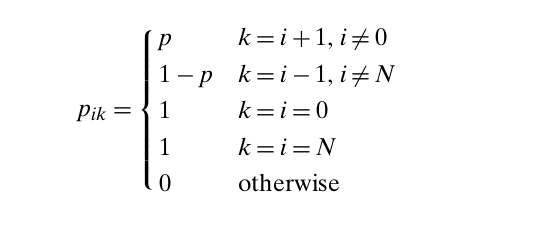
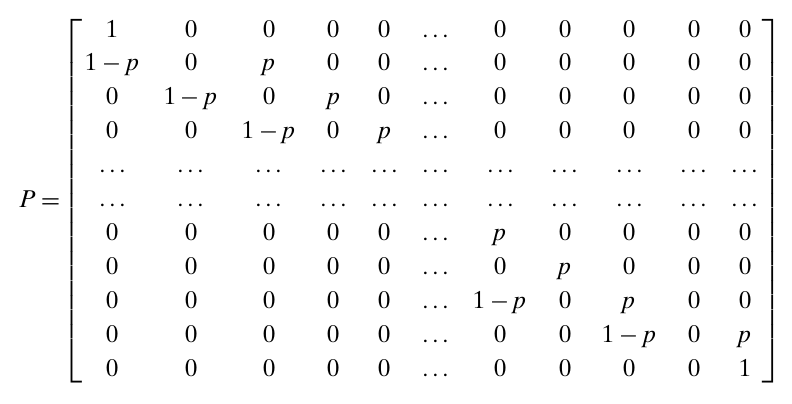

Similarly, the state-transition diagram for the game The above process assumes that both the gambler and his adversary are play- ing to obtain each other’s fortune and will stop when either one is out of money (i.e., either one is ruined). Sometimes they can play for sports, where when one is ruined, the other gives him $ 1 (or whatever is the cost of each play) to continue. That is, when the process enters state 0, then with probability 1 -  p0  , it stays in state 0, and with probability  p0  , it makes a transition to state 1. Similarly, when it enters state N, it stays in state N with probability  pN  and makes a transition to state N − 1 with probability 1 -  pN  . Note that  p0  and  pN  need not be equal to p. Also, when  p0  = 0 and  pN  = 1, we have the previous scheme. This scheme is a type of random walk with reflecting barriers

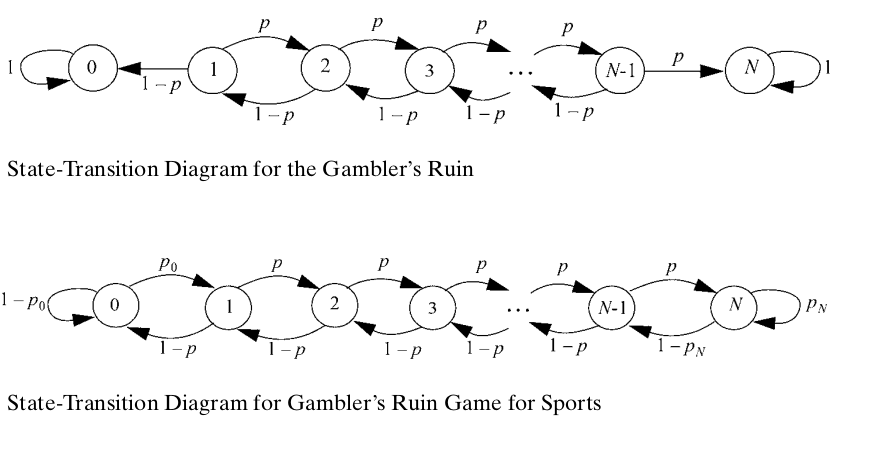

In [9]:
gd = {'a': ['b', 'd'],           # a -> b,  a -> d 
      'b': ['c', 'd', 'a'] }     # b -> c,  b -> d, b -> a


In [10]:
gd

{'a': ['b', 'd'], 'b': ['c', 'd', 'a']}

In [11]:
gd = {'a': {'b': {'weight': 0.1}, 
            'd': {'weight': 0.8}},
      'b': {'d': {'weight': 0.3},
            'c': {'weight': 0.3}}
     }



In [12]:
gd

{'a': {'b': {'weight': 0.1}, 'd': {'weight': 0.8}},
 'b': {'d': {'weight': 0.3}, 'c': {'weight': 0.3}}}

In [13]:
import networkx as nx

g = nx.DiGraph(gd)    # dictionary to graph


In [14]:


g['a']



AtlasView({'b': {'weight': 0.1}, 'd': {'weight': 0.8}})

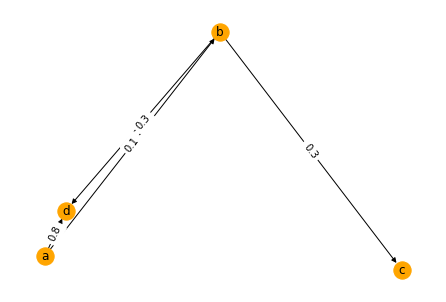

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_gph(g):
    pos = nx.spectral_layout(g)
    nx.draw(g, pos, with_labels=True, node_color='orange')
    labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels);

plot_gph(g)

In [16]:
import numpy as np
np.set_printoptions(suppress=True)

#              S0   S1   S2   S3            
P = np.array([[0.1,   0.0, 0.4, 0.5],   # S0 
              [1.0, 0.0, 0.0, 0.0],   # S1
              [0.0, 0.0, 0.0, 1.0],   # S2
              [0,   1.0, 0.0, 0.0]])  # S3

# Here S0, S1, S2, S3  are conceptual labels either
# for the Markov chain states or the digraph vertices

In [17]:
P

array([[0.1, 0. , 0.4, 0.5],
       [1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. ]])

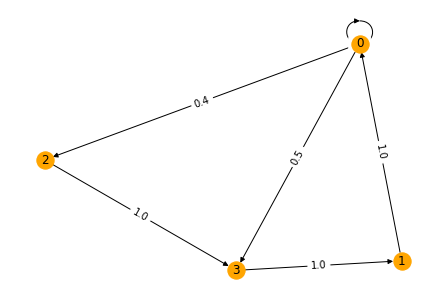

In [18]:

gP = nx.from_numpy_array(P, create_using=nx.DiGraph)

plot_gph(gP)

In [19]:
g.nodes   # note the ordering of vertices

NodeView(('a', 'b', 'd', 'c'))

In [20]:
Pg = nx.convert_matrix.to_scipy_sparse_matrix(g)
Pg.todense()

matrix([[0. , 0.1, 0.8, 0. ],
        [0. , 0. , 0.3, 0.3],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]])

In [21]:
#The example of the gambler

In [22]:
def PforG(p=0.4, N=10):
    q = 1 - p
    P = np.diag(q*np.ones(N), k=-1) + np.diag(p*np.ones(N), k=1) 
    P[0, :] = 0
    P[0, 0] = 1
    P[N, :] = 0
    P[N, N] = 1
    return P

PforG(p=0.4)

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

In [23]:
from numpy.linalg import eig, inv, det

P = PforG(p=0.4)
ew, ev = eig(P)
ew

array([-0.93184127, -0.79267153, -0.57590958, -0.30277358, -0.        ,
        0.93184127,  0.79267153,  0.30277358,  0.57590958,  1.        ,
        1.        ])

In [24]:


H = ev[:, abs(ew - 1) < 1e-15]     # Eigenvectors of eigenvalue 1
M = np.array([H[0, :], H[-1, :]])  # Matrix of the two conditions
det(M)



0.28255420036878215

In [25]:
def Gchances(p=0.4, N=10):
    P = PforG(p, N)
    ew, ev = eig(P)
    H = ev[:, abs(ew - 1) < 1e-15]
    M = np.array([H[0, :], H[-1, :]])
    c = inv(M) @ np.array([0, 1]) 
    return H @ c

In [26]:
h = Gchances(p=0.4)
h

array([0.        , 0.00882378, 0.02205946, 0.04191297, 0.07169324,
       0.11636364, 0.18336924, 0.28387764, 0.43464024, 0.66078414,
       1.        ])

In [33]:
from random import uniform

def gamble(init=2, p=0.4, win=10, n=10000):

    """Let G gamble "n" times, starting with "init" chips."""
    
    wl = np.zeros(n)   # mark win or lose here for each gamble i
    for i in range(n):
        chips = init
        while chips:
            if uniform(0, 1) > p:  # losing game
                chips -= 1
            else:                  # winning game
                chips += 1
            if chips == win:       # reached wanted winnings
                wl[i] = 1
                break
    return wl

In [35]:

n = 5000
wl = gamble(n=n)
print('Proportion of winning gambles:', np.count_nonzero(wl) / n)



Proportion of winning gambles: 0.0222


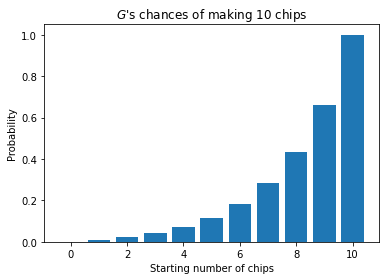

In [30]:


plt.bar(range(len(h)), h)
plt.title('$G$\'s chances of making 10 chips');
plt.xlabel('Starting number of chips'); plt.ylabel('Probability');



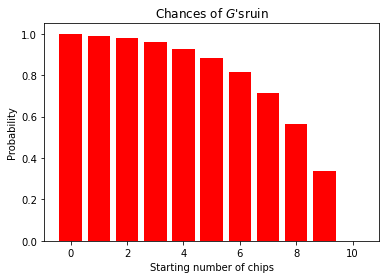

In [31]:


plt.bar(range(len(h)), 1-h, color='red')
plt.title('Chances of $G$\'sruin');
plt.xlabel('Starting number of chips'); plt.ylabel('Probability');



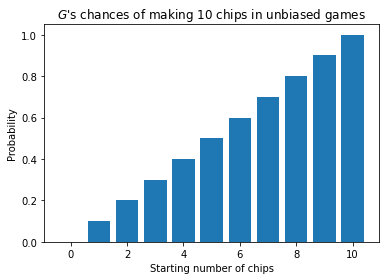

In [32]:


plt.bar(range(len(h)), Gchances(p=0.5, N=10))
plt.title('$G$\'s chances of making 10 chips in unbiased games');
plt.xlabel('Starting number of chips'); plt.ylabel('Probability');


Application of Markov Chain Rule: For Ex:

Write a program for Gambler's ruin and obtain the simulation graph
Gambler’s Ruin The random walk described above assumes that the process can continue forever; in other words, it is unbounded. If the walk is bounded, then the ends of the walk are called barriers. These barriers can impose different characteristics on the process. For example, they can be reflecting barriers, which means that on hitting them the walk turns around and continues. They can also be absorbing barriers, which means that the walk ends.

Consider the following random walk with absorbing barriers, which is gen- erally referred to as the gambler’s ruin. Suppose a gambler plays a sequence of independent games against an opponent. He starts out with $ k, and in each game he wins $ 1 with probability p and loses $ 1 with probability q = 1 - p. When p > q, the game is advantageous to the gambler either because he is more skilled than his opponent or the rules of the game favor him. If p = q, the game is fair; and if p < q, the game is disadvantageous to the gambler.

Assume that the gambler stops when he has a total of $ N, which means he has additional $ (N - k) over his initial $ k. (Another way to express this is that he plays against an opponent who starts out with $ (N - k) and the game stops when either player has lost all of his or her money.) We are interested in computing the probability rk that the player will be ruined (or he has lost all of his or her money) after starting with $ k.

To solve the problem, we note that at the end of the first game, the player will have the sum of $ k + 1 if he wins the game (with probability p) and the sum of $ (k − 1) if he loses the game (with probability q). Thus, if he wins the first game, the probability that he will eventually be ruined is rk+1 ; and if he loses his first game, the probability that he will be ruined is rk−1 . There are two boundary conditions in this problem. First, r0=1, since he cannot gamble when he has no money. Second, rN=0, since he cannot be ruined. Thus, we obtain the following difference equation:
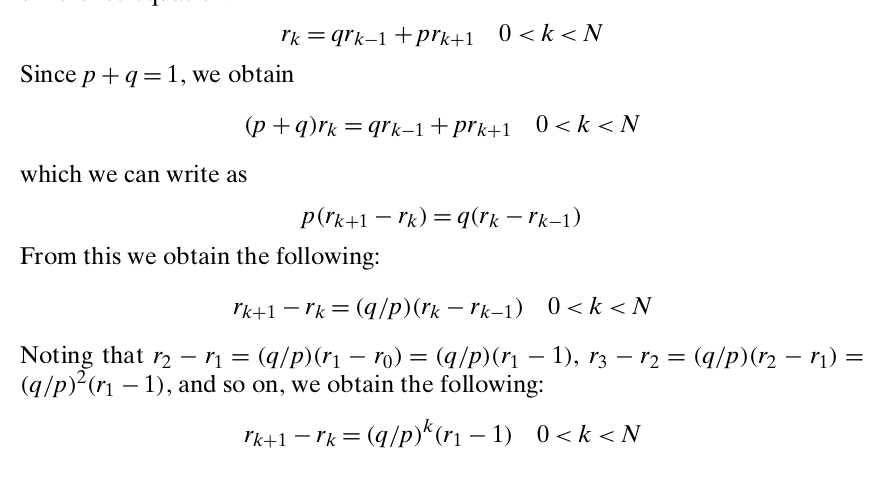
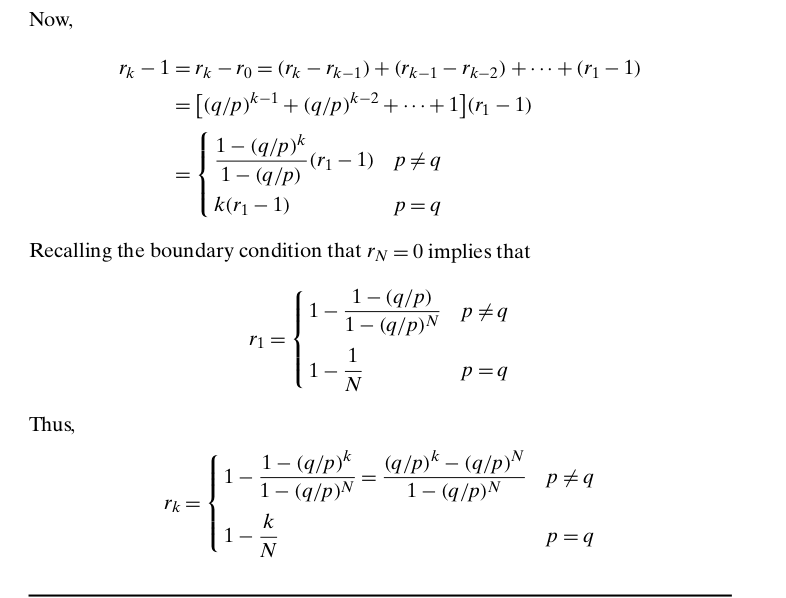

Gambler’s Ruin as a Markov Chain
Recall the gambler’s ruin problem discussed in section 10.3.1. Two players A and B play a series of games with A starting with $ a and B starting with $ b, where a+b=N. With probability p player A wins each game from player B and thus gains an additional $ 1; and with probability q=1−p player A loses each game to B and thus loses $ 1. If A reaches $ 0 he is ruined, and the game ends. Similarly if B reaches $ 0, he is ruined and the game is over. Let the state of the game be k, which denotes the total amount that A currently has. Thus, the game ends when k=0 and A is ruined; it also ends when k=N and B is ruined. This means that states 0 and N are absorbing states. Let pik denote the conditional probability that the game will move to state k next, given that it is currently in state i. Then pik is the state transition probability, which is given by

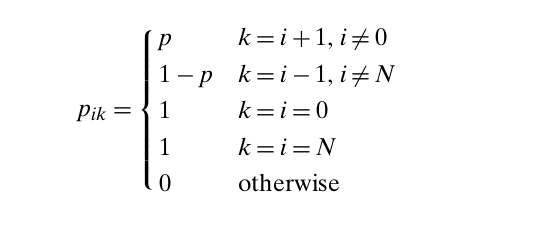
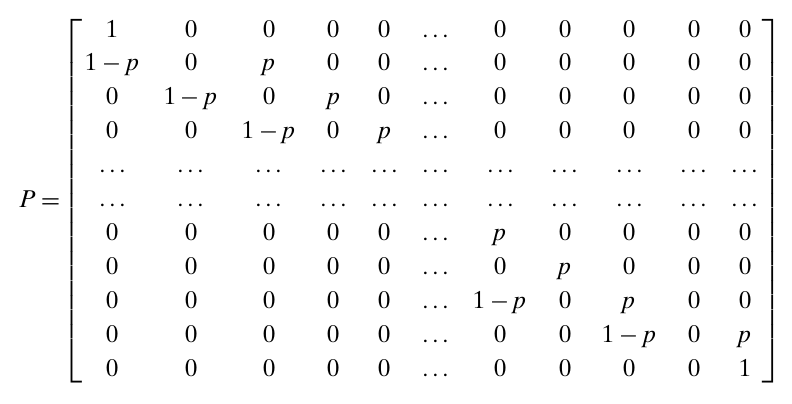

Similarly, the state-transition diagram for the game The above process assumes that both the gambler and his adversary are play- ing to obtain each other’s fortune and will stop when either one is out of money (i.e., either one is ruined). Sometimes they can play for sports, where when one is ruined, the other gives him $ 1 (or whatever is the cost of each play) to continue. That is, when the process enters state 0, then with probability 1 -  p0  , it stays in state 0, and with probability  p0  , it makes a transition to state 1. Similarly, when it enters state N, it stays in state N with probability  pN  and makes a transition to state N − 1 with probability 1 -  pN  . Note that  p0  and  pN  need not be equal to p. Also, when  p0  = 0 and  pN  = 1, we have the previous scheme. This scheme is a type of random walk with reflecting barriers

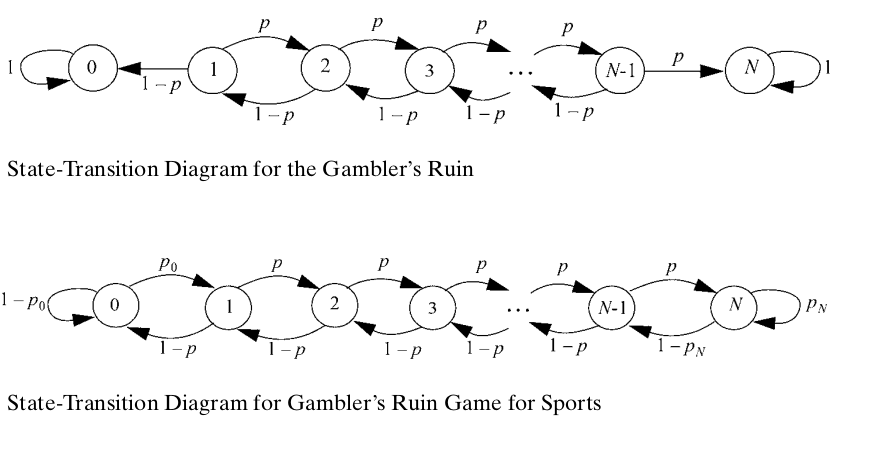